Martin Paz

### TP1 Visión por computadora

#### Parte 1  (imágenes en /white_patch y /coord_cromaticas):

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

#### Parte 2 

1. Para las imágenes im1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.
2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que observa, si tuviera que entrenar un modelo de clasificacion/deteccion de imagenes, considera que puede ser de utilidad tomar como 'features' a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [130]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [131]:
def image(image):
    imagen = cv.imread(image)
  
    imgRGB = cv.cvtColor(imagen,cv.COLOR_BGR2RGB)
    # Muestro la imagen color
    #plt.imshow(imgRGB)
    #plt.show()
    return imgRGB

In [132]:
def convertir_a_coordenadas_cromaticas(img_RGB):
    # Convertir a float32 para precisión en las operaciones
    img_RGB = img_RGB.astype(np.float32)
    
    # Separar los canales
    img_r, img_g, img_b = cv.split(img_RGB)
    
    # Calcular el denominador y evitar divisiones por cero
    den = img_r + img_g + img_b
    den[den == 0] = 1e-8  # Asegura que no haya divisiones por cero

    # Calcular las coordenadas cromáticas
    img_r_new = img_r / den
    img_g_new = img_g / den
    img_b_new = img_b / den
    
    # Combinar los canales de nuevo
    imgRGB_new = cv.merge((img_r_new, img_g_new, img_b_new))
    
    return imgRGB_new

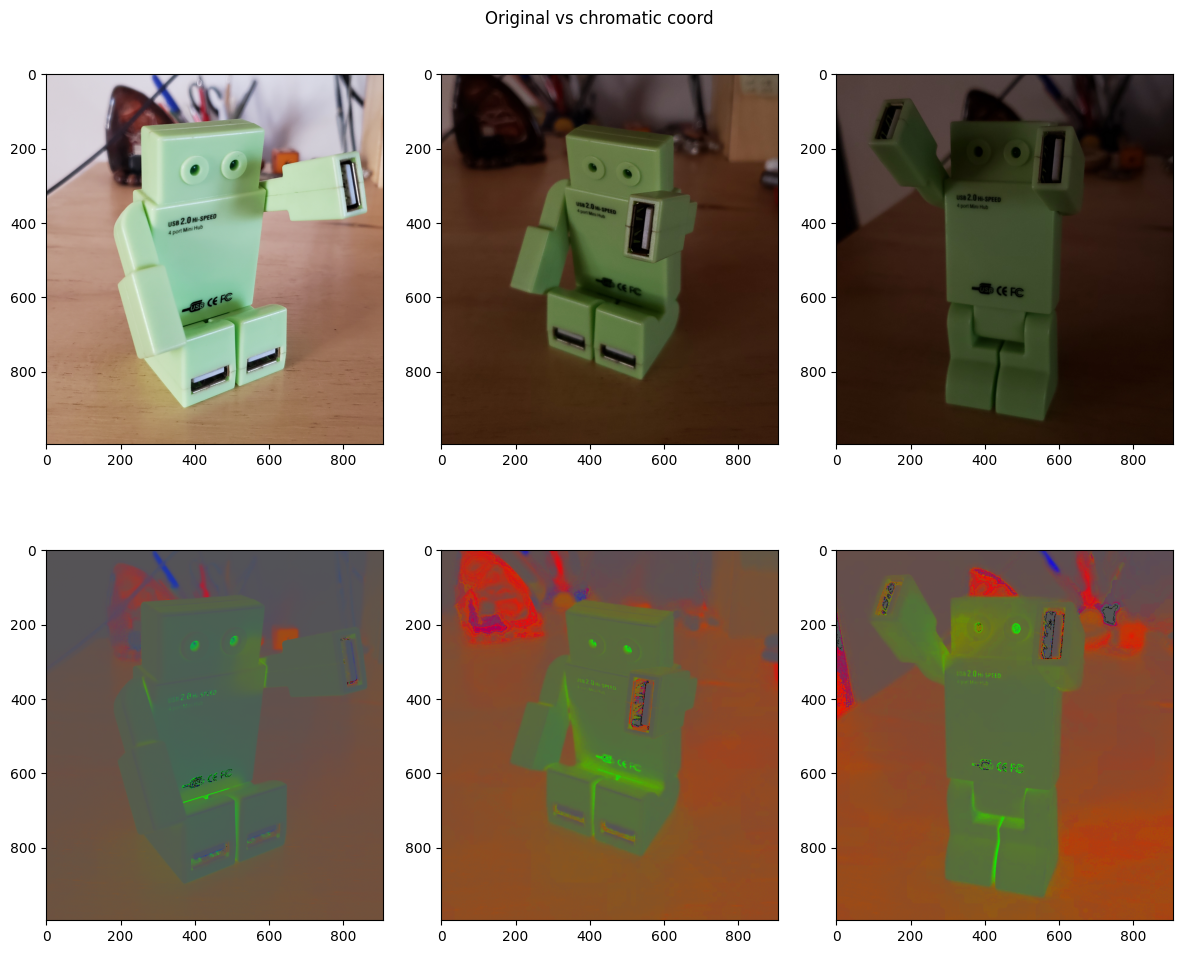

In [133]:
imgRGB_1 = image('./coord_cromaticas/CoordCrom_1.png')
imgRGB_2 = image('./coord_cromaticas/CoordCrom_2.png')
imgRGB_3 = image('./coord_cromaticas/CoordCrom_3.png')
imgRGB_new_1 = convertir_a_coordenadas_cromaticas(imgRGB_1)
imgRGB_new_2 = convertir_a_coordenadas_cromaticas(imgRGB_2)
imgRGB_new_3 = convertir_a_coordenadas_cromaticas(imgRGB_3)
fig, axs = plt.subplots(2, 3, figsize=(12,10))
fig.suptitle('Original vs chromatic coord')
fig.tight_layout() 

axs[0,0].imshow(imgRGB_1)
axs[0,1].imshow(imgRGB_2)
axs[0,2].imshow(imgRGB_3)
axs[1,0].imshow(imgRGB_new_1)
axs[1,1].imshow(imgRGB_new_2)
axs[1,2].imshow(imgRGB_new_3)

In [134]:
def image_white_patch(img, perc=95):
    # Separar en los canales RGB
    img_r, img_g, img_b = cv.split(img)

    # Calcular los percentiles
    max_r = np.percentile(img_r, perc)
    max_g = np.percentile(img_g, perc)
    max_b = np.percentile(img_b, perc)

    # Aplicar el algoritmo White Patch con el percentil
    img_r = np.clip( (255 / max_r) * img_r, 0, 255).astype('uint8')
    img_g = np.clip( (255 / max_g) * img_g, 0, 255).astype('uint8')
    img_b = np.clip( (255 / max_b) * img_b, 0, 255).astype('uint8')

    # Fusionar de nuevo en la imagen corregida
    imgRGB_new = cv.merge((img_r,img_g,img_b))

    return imgRGB_new

imgWP_1 = image('./white_patch/wp_blue.jpg')
imgWP_2 = image('./white_patch/wp_green.png')
imgWP_3 = image('./white_patch/wp_red.png')

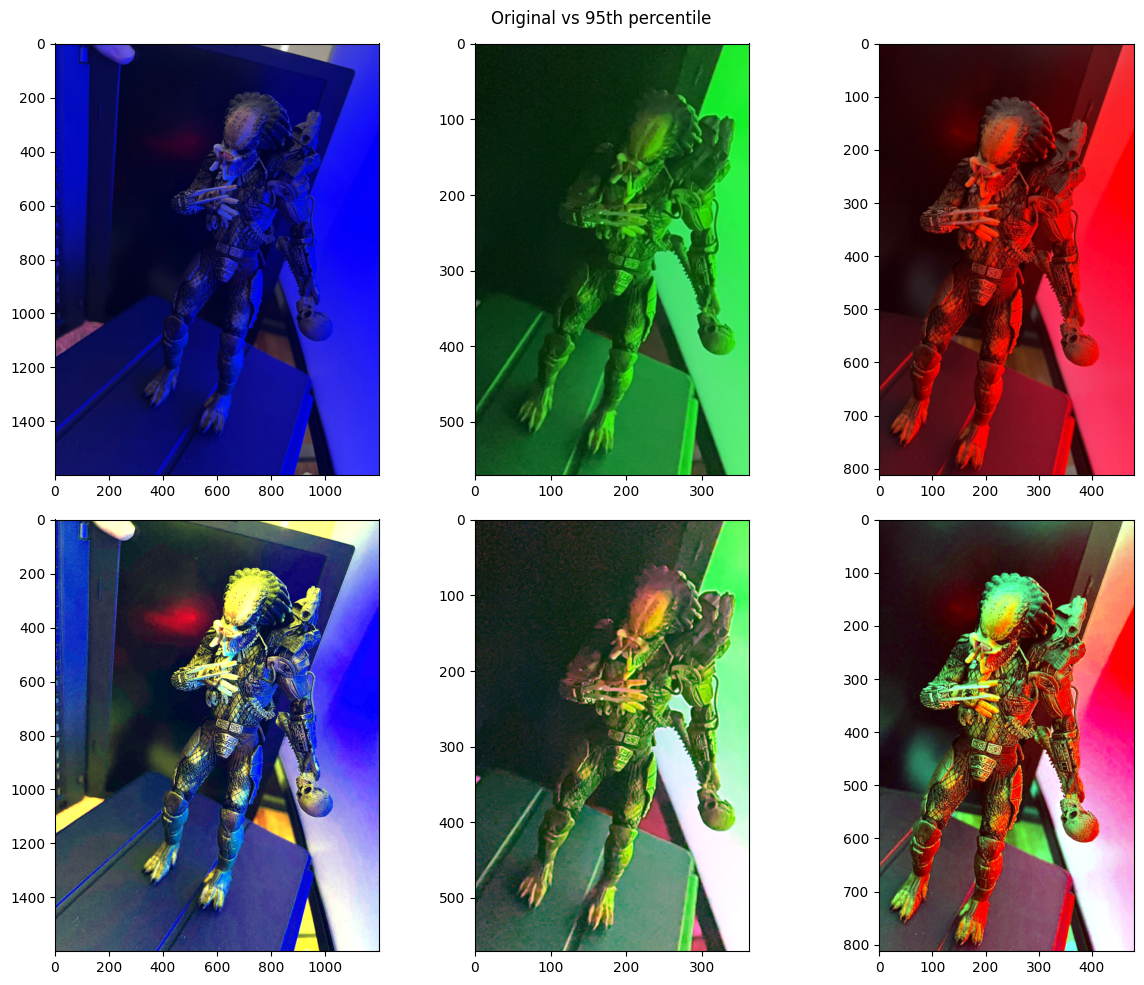

In [135]:
imgWP_new_1_95 = image_white_patch(imgWP_1)
imgWP_new_2_95 = image_white_patch(imgWP_2)
imgWP_new_3_95 = image_white_patch(imgWP_3)
fig, axs = plt.subplots(2, 3, figsize=(12,10))
fig.suptitle('Original vs 95th percentile')
fig.tight_layout() 

axs[0,0].imshow(imgWP_1)
axs[0,1].imshow(imgWP_2)
axs[0,2].imshow(imgWP_3)
axs[1,0].imshow(imgWP_new_1_95)
axs[1,1].imshow(imgWP_new_2_95)
axs[1,2].imshow(imgWP_new_3_95)

#### Parte 2

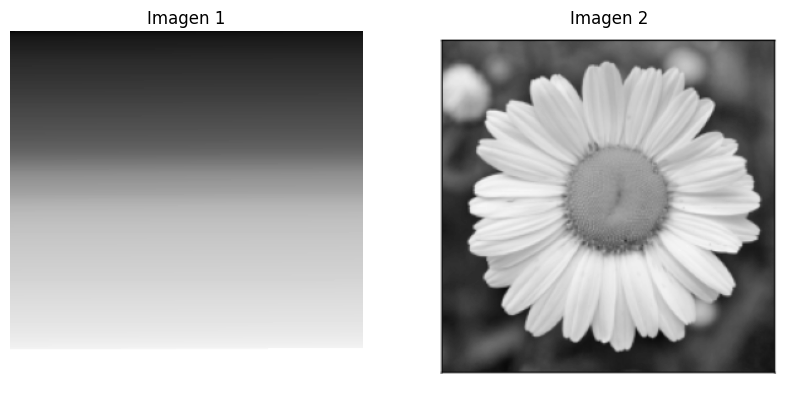

In [136]:
img_1 = cv.imread('./img1_tp.png', cv.IMREAD_GRAYSCALE)
img_2 = cv.imread('./img2_tp.png', cv.IMREAD_GRAYSCALE)

# Visualizar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.title('Imagen 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_2, cmap='gray')
plt.title('Imagen 2')
plt.axis('off')

plt.show()

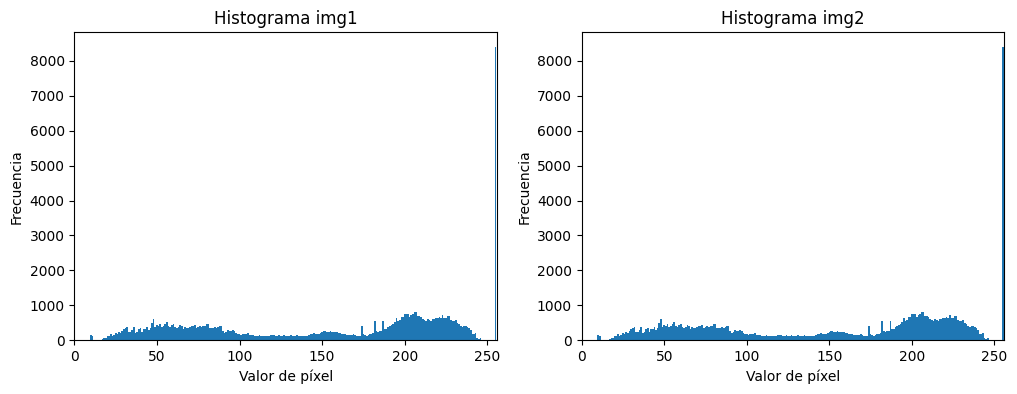

In [137]:
# Definir el número de bins para el histograma
num_bins = 256

# Calcular los histogramas de ambas imágenes
hist1, bins1 = np.histogram(img_1, bins=num_bins, range=[0, 256])
hist2, bins2 = np.histogram(img_2, bins=num_bins, range=[0, 256])

# Visualizar los histogramas
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.bar(bins1[:-1], hist1, width=1)
plt.xlim([0, 256])
plt.title('Histograma img1')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.bar(bins2[:-1], hist2, width=1)
plt.xlim([0, 256])
plt.title('Histograma img2')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.show()

In [138]:
# Calcular la diferencia absoluta entre los histogramas
diff = np.abs(hist1 - hist2)

# Sumar las diferencias para obtener una medida de la diferencia total
total_diff = np.sum(diff)

print("Diferencia total entre los histogramas:", total_diff)


Diferencia total entre los histogramas: 0


Elegir un número de bins adecuado, como 256 (que corresponde a la profundidad de 8 bits), permite observar la distribución de intensidad de píxeles para cada imagen. Mediante el histograma se pueden detectar patrones comunes en diferentes ímagenes o para usar esa información para filtrar la imagen.

Para este caso ambos histogramas presentan un grafico extremadamente similar, por lo que siempre hay excepciones y se tendra que analizar con otra alternativa.

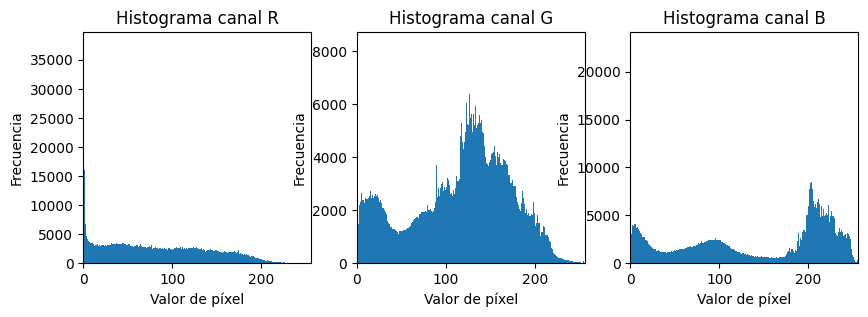

In [139]:
img = cv.imread('./segmentacion.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Calcular los histogramas de los canales RGB
hist_r, bins_r = np.histogram(img[:,:,0], bins=256, range=[0, 256])
hist_g, bins_g = np.histogram(img[:,:,1], bins=256, range=[0, 256])
hist_b, bins_b = np.histogram(img[:,:,2], bins=256, range=[0, 256])

# Visualizar los histogramas
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.bar(bins_r[:-1], hist_r, width=1)
plt.xlim([0, 256])
plt.title('Histograma canal R')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.bar(bins_g[:-1], hist_g, width=1)
plt.xlim([0, 256])
plt.title('Histograma canal G')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.bar(bins_b[:-1], hist_b, width=1)
plt.xlim([0, 256])
plt.title('Histograma canal B')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.show()


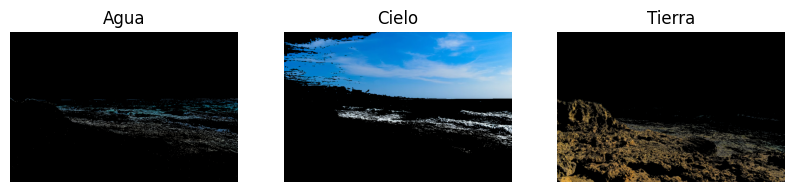

In [140]:
# Segmentar la imagen en tres regiones (agua, cielo y tierra)
# Definir los límites para cada región (en valores RGB)
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([255, 255, 255])

lower_green = np.array([0, 0, 120])
upper_green = np.array([150, 255, 150])

lower_brown = np.array([50, 50, 0])
upper_brown = np.array([255, 200, 100])

# Crear las máscaras para cada región
mask_blue = cv.inRange(img, lower_blue, upper_blue)
mask_green = cv.inRange(img, lower_green, upper_green)
mask_brown = cv.inRange(img, lower_brown, upper_brown)

# Aplicar las máscaras a la imagen original
blue_pixels = cv.bitwise_and(img, img, mask=mask_blue)
green_pixels = cv.bitwise_and(img, img, mask=mask_green)
brown_pixels = cv.bitwise_and(img, img, mask=mask_brown)

# Visualizar las imágenes segmentadas
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(green_pixels)
plt.title('Agua')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blue_pixels)
plt.title('Cielo')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(brown_pixels)
plt.title('Tierra')
plt.axis('off')

plt.show()